In [18]:
import pandas as pd

# Define the column names
columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

# Read the text file
with open('/content/data_banknote_authentication.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store the data
data = []

# Parse each line and append to the data list
for line in lines:
    values = line.strip().split(',')
    data.append([float(value) for value in values])

# Create DataFrame
banknotes = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(banknotes)


      variance  skewness  kurtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699    0.0
1      4.54590   8.16740   -2.4586 -1.46210    0.0
2      3.86600  -2.63830    1.9242  0.10645    0.0
3      3.45660   9.52280   -4.0112 -3.59440    0.0
4      0.32924  -4.45520    4.5718 -0.98880    0.0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949    1.0
1368  -1.38870  -4.87730    6.4774  0.34179    1.0
1369  -3.75030 -13.45860   17.5932 -2.77710    1.0
1370  -3.56370  -8.38270   12.3930 -1.28230    1.0
1371  -2.54190  -0.65804    2.6842  1.19520    1.0

[1372 rows x 5 columns]


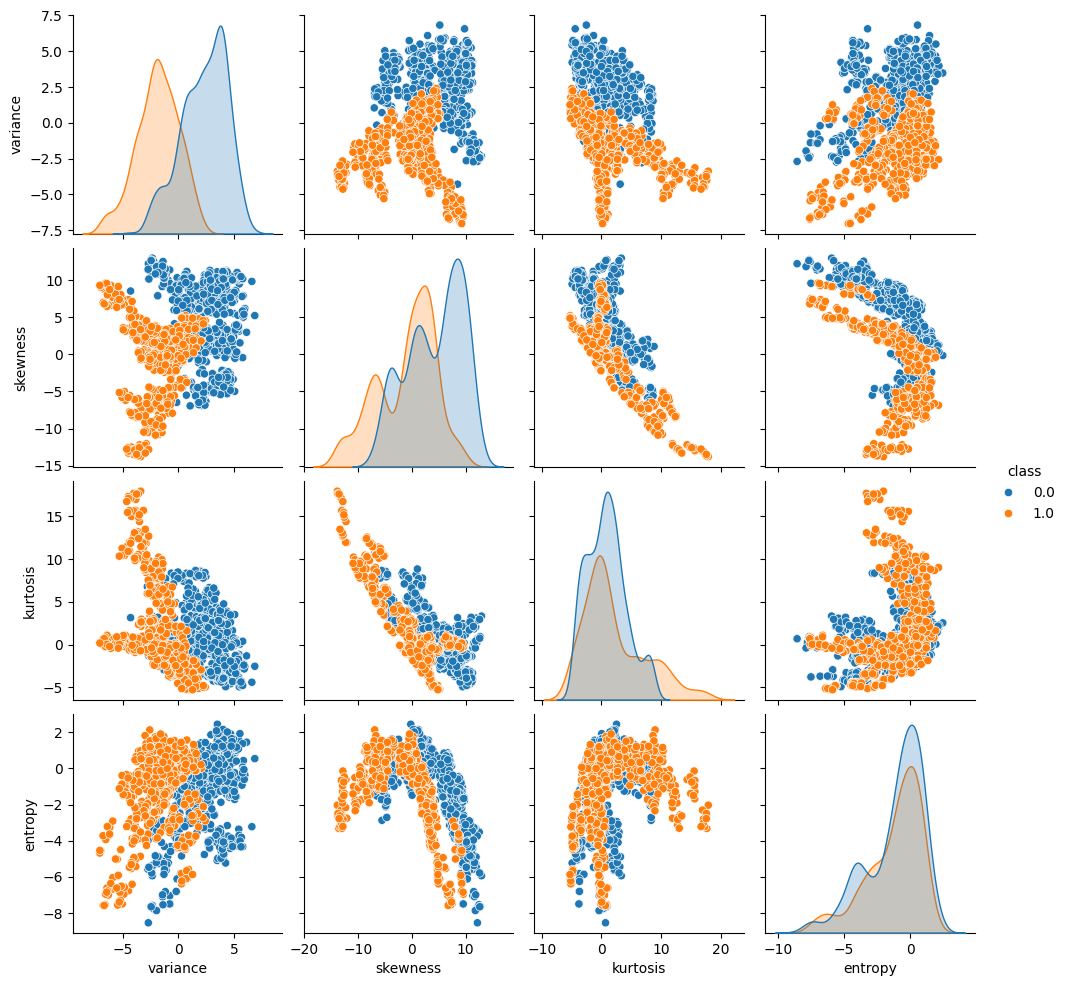

In [19]:

import seaborn as sns
# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class')

# Show the plot
plt.show()



In [20]:
# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

Dataset stats: 
           variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0.0    762
1.0    610
Name: class, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 100)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9635
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9654
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9663
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1041 - accuracy: 0.9681
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9672
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9699
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9699
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9699
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9699
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9708
Epoch 11/